## Content 

 <b>1 | Preprocessing Steps</b>
 
    1.1 Import Libraries
    1.2 Configure Settings
    1.3 Import Files

 <b>2 | Structure Investigation</b>
 
    2.1 Initial Steps
    2.2 Null Value Check
    2.3 Structure of features
    2.4 Value Behaviour
    
 <b>3 | Univariate Analysis</b>
 
    3.1 Numerical Features
    3.2 Non Numerical Features

 <b>4 | Multivariate Analysis</b>
 
    4.1 Creating Relation Matrix and Graph
    4.2 Relation With Stroke (Target Column)
        4.2.1 Numerical Features
        4.2.2 Catgorical Features

## 1 | Preprocessing Steps

### 1.1 | Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 1.2 | Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

### 1.3 | Import Files

In [40]:
df_raw=pd.read_csv("train.csv")
df=df_raw.copy()

## 2 | Structure Investigation

### 2.1 | Initial Steps

In [41]:
df.shape

(15304, 12)

In [42]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [44]:
pd.value_counts(df.dtypes)

object     5
int64      4
float64    3
dtype: int64

### 2.2 | Null Value Check

No null values Observed

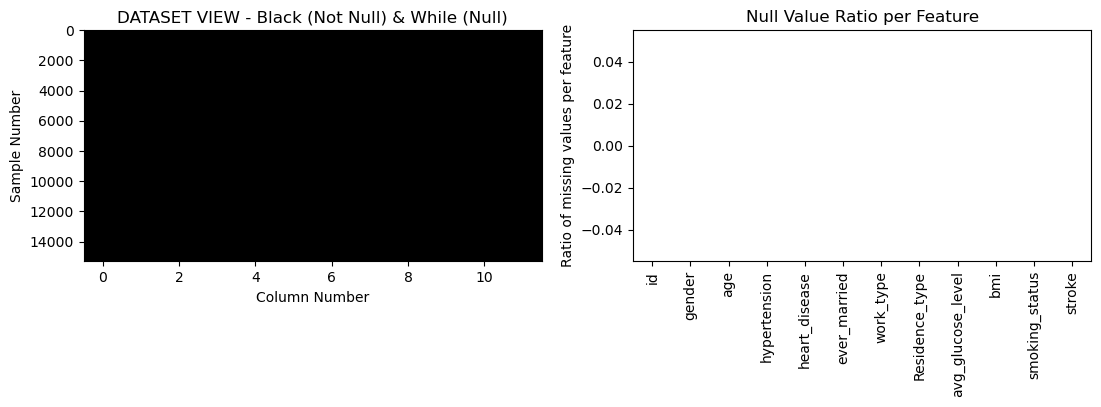

In [45]:
plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

### 2.3 | Structure of features

* 5 non numerical column 

In [46]:
# non-numerical features
df.select_dtypes(exclude="number").head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,never smoked
1,Male,Yes,Private,Rural,formerly smoked
2,Female,Yes,Private,Rural,Unknown
3,Male,Yes,Private,Urban,never smoked
4,Female,No,Private,Rural,never smoked


In [47]:
# All Values are Unique
df.describe(exclude="number")

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [48]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [49]:
df.drop(columns='id',inplace=True)

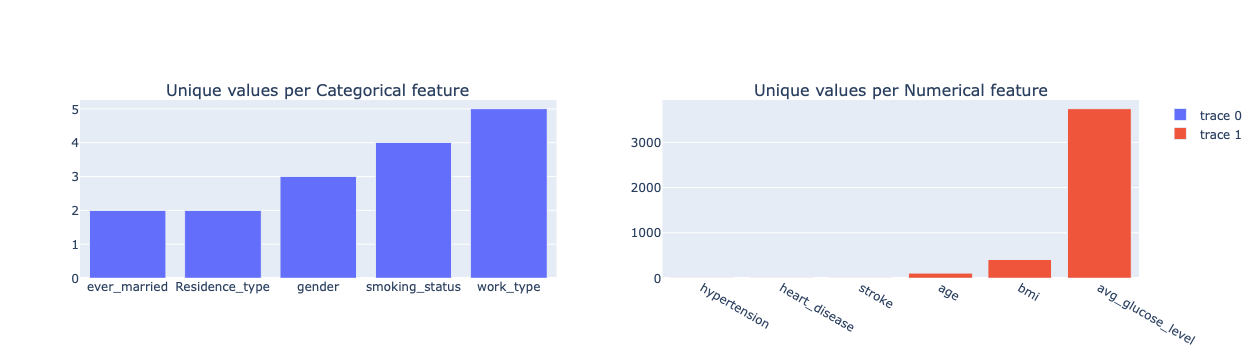

In [50]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

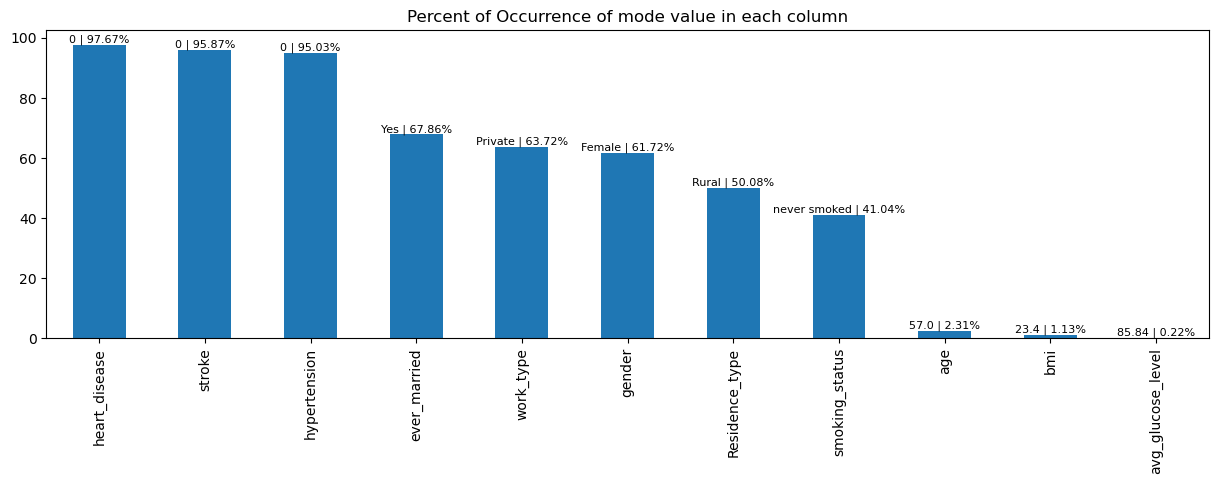

In [51]:
mod_percent_value={i:(df[i].value_counts().max()/df[i].size)*100 for i in df.columns}

#plot graph
pd.Series(mod_percent_value).sort_values(ascending=False).plot.bar(figsize=(15, 4))

# annotate text on top of each bar
for i, val in enumerate(pd.Series(mod_percent_value).sort_values(ascending=False).index):
    plt.text(i, pd.Series(mod_percent_value)[val], (df[val].astype(str).mode()[0])+str(" | "+str('{0:.2f}'.format(pd.Series(mod_percent_value)[val]))+"%")
             , horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':100, 'size':8})
plt.title("Percent of Occurrence of mode value in each column")
plt.show()

***
### 2.5 | Value Behaviour

* Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature.
* The y-axis shows the feature value, while the x-axis is the sample index

***
* Observation
  * hypertension , heart_disease and stroke are categorial column stored as number
  
***

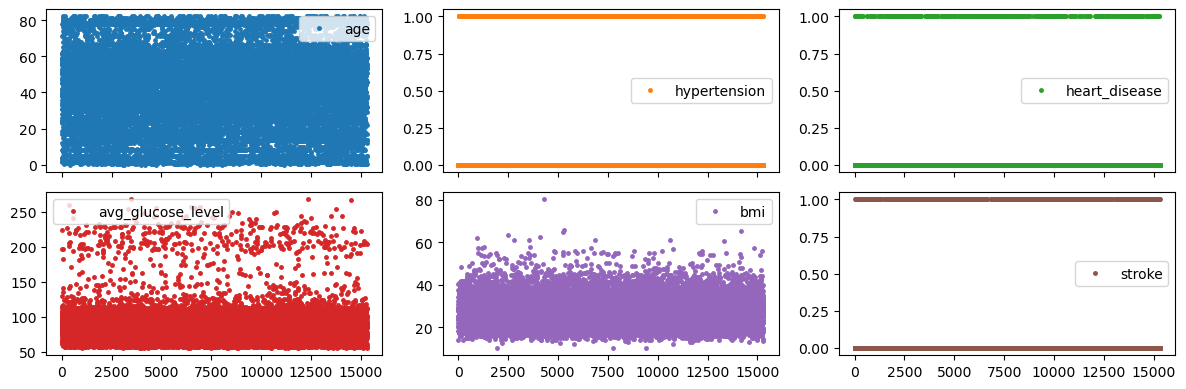

In [38]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,4), markersize=5)
plt.tight_layout()

In [52]:
df["hypertension"]=df["hypertension"].astype('str')
df["heart_disease"]=df["heart_disease"].astype('str')
df["stroke"]=df["stroke"].astype('str')

## 3 | Univariate Analysis

### 3.1 | Numerical Features

In [67]:
df.select_dtypes(include='number').skew()

age                 -0.103579
avg_glucose_level    3.037242
bmi                  0.713051
dtype: float64

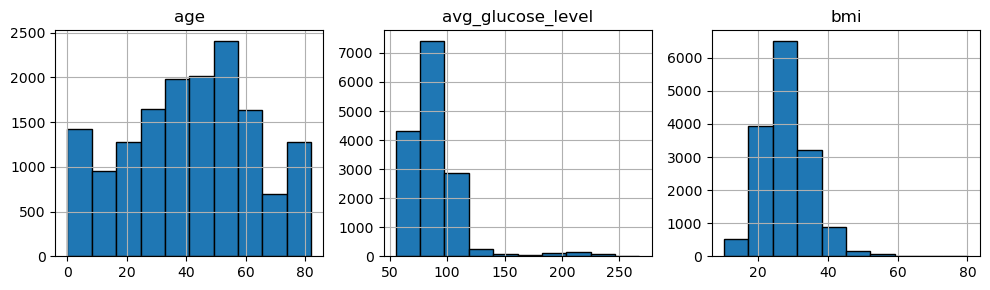

In [65]:
# histogram for each numerical feature in a separate subplot
figsize_val=(10,3)
layout_val=(-1, 3)
df.hist( figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

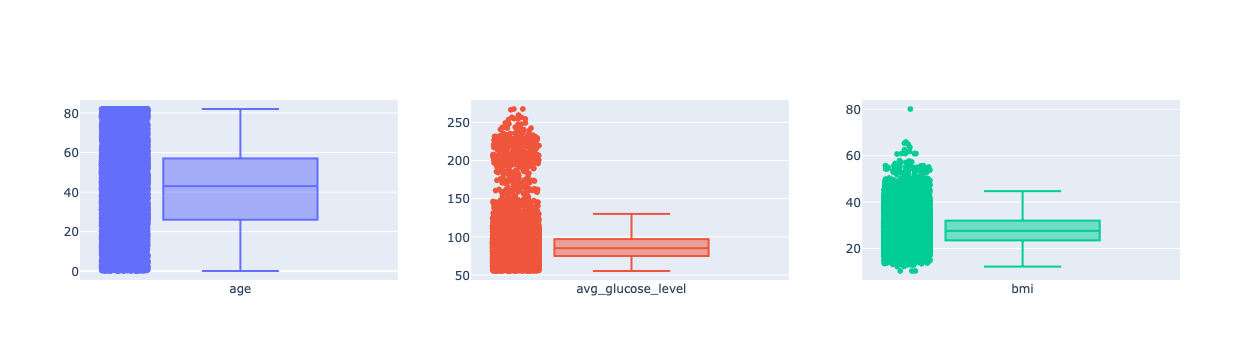

In [68]:
vars = df.select_dtypes(include='number').columns

row=7
fig = make_subplots(rows=math.ceil(len(vars)/row), cols=len(vars))
j=0

for i, var in enumerate(vars):
    if i%row==0:
        j=j+1

    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=j, col=(i%row)+1
    )

fig.update_traces(boxpoints='all', jitter=.3)
fig.update_layout(showlegend=False)

fig.show()

In [72]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

columns_to_be_checked=vars

for i in columns_to_be_checked:
    temp_min=df[df[i]== df[i].min()][['stroke',i]]
    temp_max=df[df[i]== df[i].max()][['stroke',i]]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min[i].values[0],'| stroke -> ',
          str(set(temp_min['stroke'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    print('Max Value ->',temp_max[i].values[0],'| stroke -> ',
          str(set(temp_max['stroke'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)


Column ->  age 
Min Value -> 0.08 | stroke ->  0
Max Value -> 82.0 | stroke ->  0, 1
No of Outliers presesnt ->  0

 **********

Column ->  avg_glucose_level 
Min Value -> 55.22 | stroke ->  0
Max Value -> 267.6 | stroke ->  0, 1
No of Outliers presesnt ->  545

 **********

Column ->  bmi 
Min Value -> 10.3 | stroke ->  0
Max Value -> 80.1 | stroke ->  0
No of Outliers presesnt ->  251

 **********


### 3.2 | Non Numerical Features

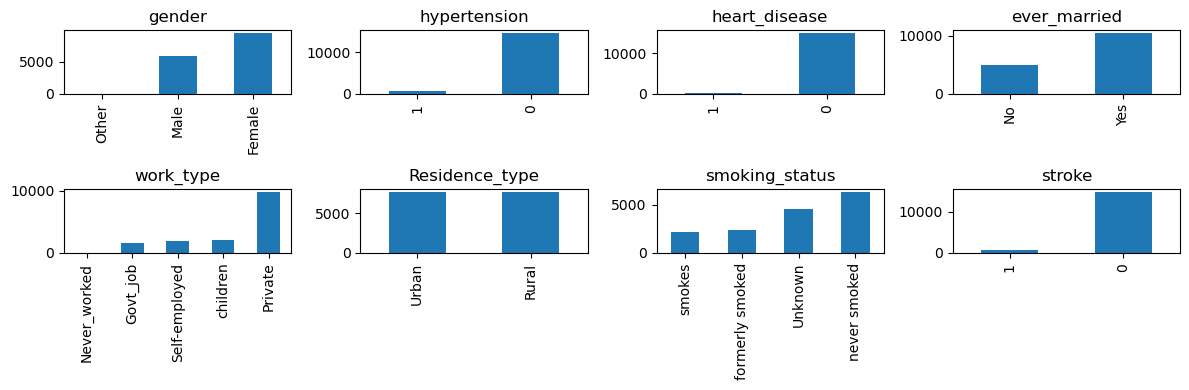

In [77]:
fields=df.select_dtypes(exclude='number').columns

figuresize=(12,4)
cols=4
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_values().plot.bar()  
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(fields[i-1])
plt.show()

## 4 | Multivariate Analysis

### 4.1 | Creating Relation Matrix and Graph

* Age and Bmi have a moderate linear relationship

In [78]:
df.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.108897,0.390721
avg_glucose_level,0.108897,1.000000,0.108142
bmi,0.390721,0.108142,1.000000


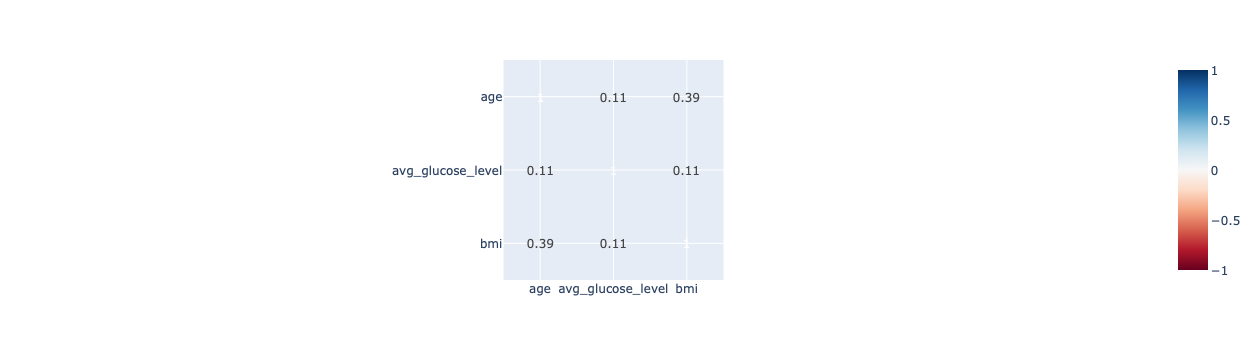

In [83]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=600,height=350,aspect=None,color_continuous_scale='rdbu')
fig.show()

### 4.2 | Relation With Stroke (Target Column)

#### 4.2.1 | Numerical Features 

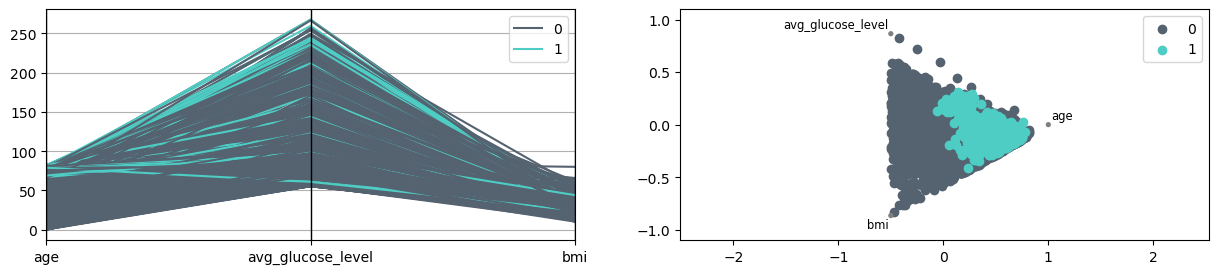

In [132]:
temp_li=df.select_dtypes(include='number').columns.to_list()
temp_li.append("stroke")

plt.subplots(1,2,figsize=(15, 3))

plt.subplot(1,2,1)
pd.plotting.parallel_coordinates(df[temp_li], "stroke",color=('#556270', '#4ECDC4'))


plt.subplot(1,2,2)
pd.plotting.radviz(df[temp_li], "stroke",color=('#556270', '#4ECDC4'))

plt.show()

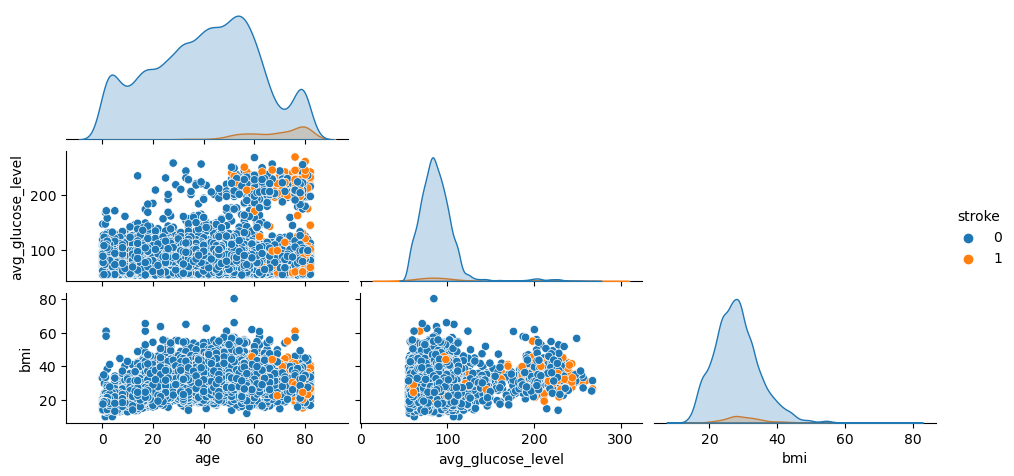

In [149]:
temp_li=df.select_dtypes(include='number').columns.to_list()

sns.pairplot(data=df,
                  hue='stroke',height=1.6,aspect=2,
                 corner=True
)
                  
plt.show()

<b> Observation <b/>

* People having Stroke are having higher in age. 
* No case presen of People having Stroke with low age.
* Mostly not all have higher avg_glucose_level 

#### 4.2.2 | Categorical Features

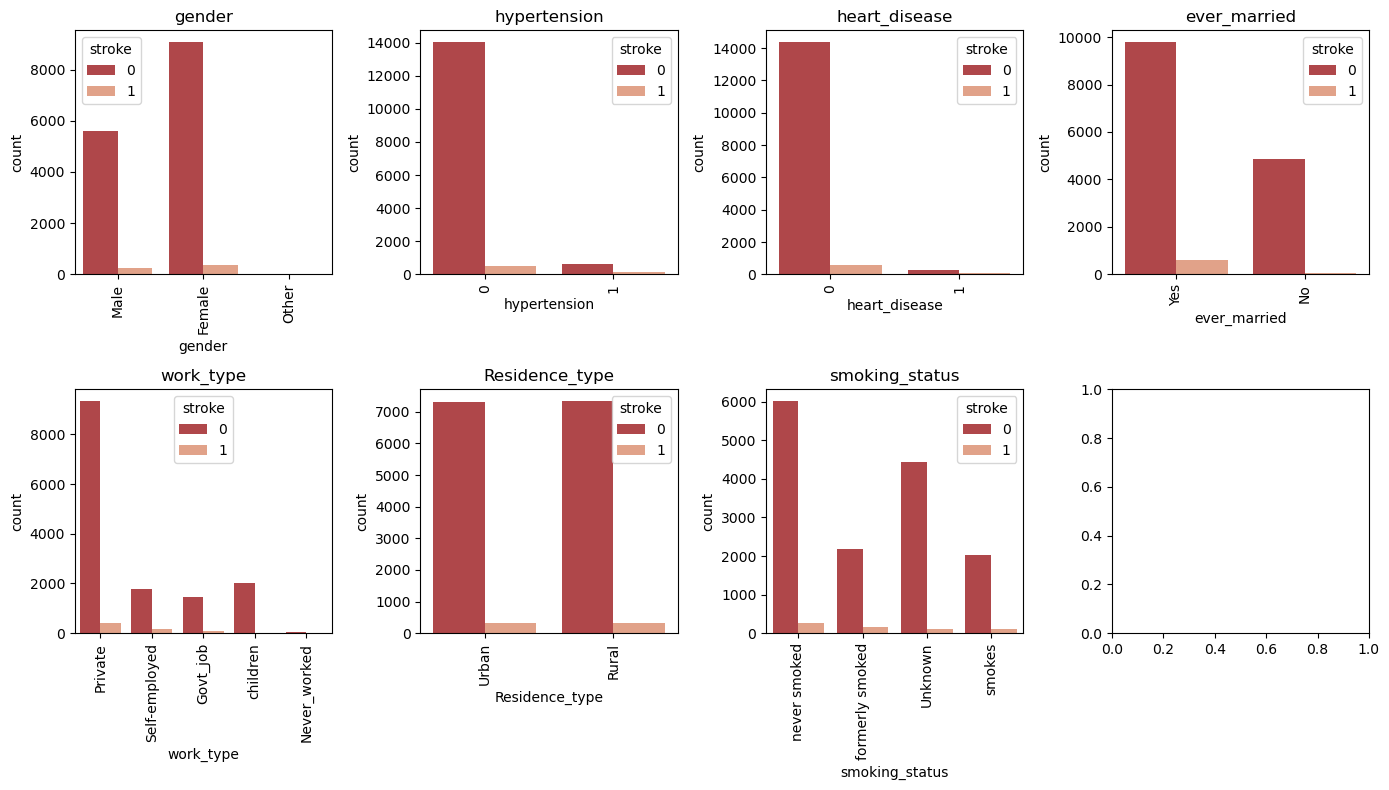

In [76]:
cat_threshold=10

x=df.select_dtypes(exclude='number').columns.to_list()

y="stroke"
x.remove(y)

figuresize=(14,8)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(x[i-1])
plt.show()


In [167]:
# finding the subactegory among each column with highest ratio of stroke
x=df.select_dtypes(exclude='number').columns.to_list()
x.remove('stroke')
# x contains all columns having distinct value <= 10 (cat_threshold)
# Target is to group by one by one column in x with attrition (Group by col,Attrition  and get the ratio of sub categories resulted by group by )

for i in x:
    Coloumn_To_Aggregate=[i]
    Coloumn_To_Aggregate.append('stroke')
    df6=pd.merge(
        df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
        df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), 
        on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.stroke=='1') & (df6.Sub_Ratio >= 0.10)]) :
        print(i)
    

hypertension
heart_disease


In [166]:

# Further analyzing odd subcategory
Coloumn_To_Aggregate=['hypertension','stroke']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.hypertension=='1') & (df6.Sub_Ratio >= 0.15)][['hypertension','stroke','Sub_Ratio']]

,hypertension,stroke,Sub_Ratio
2,1,0,0.83
3,1,1,0.17


In [170]:
# Further analyzing odd subcategory
Coloumn_To_Aggregate=['heart_disease','stroke']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.heart_disease=='1') & (df6.Sub_Ratio >= 0.15)][['heart_disease','stroke','Sub_Ratio']]

,heart_disease,stroke,Sub_Ratio
2,1,0,0.82
3,1,1,0.18


<b>Observation<b/>

* 18 % of the people having heart disease suffered stroke. 
* 17 % of the people having hypertension suffered stroke.